In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,NaN,1.0,1,1.0,0.0,0.0,0.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,1.0,2.0,0,0.0,0.0,3.0,NaN,3.0,0,...,NaN,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,NaN
2,2.0,2.0,1.0,0,0.0,0.0,3.0,0.0,2.0,0,...,0.0,0.0,0.0,2.0,NaN,NaN,3.0,2.0,0.0,NaN
3,2.0,2.0,2.0,1,0.0,0.0,2.0,0.0,NaN,2,...,0.0,0.0,0.0,2.0,0.0,NaN,2.0,2.0,NaN,7.0
4,2.0,2.0,1.0,0,0.0,0.0,2.0,0.0,2.0,0,...,0.0,0.0,0.0,3.0,0.0,NaN,2.0,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,NaN,2,1.0,0.0,0.0,0.0,0.0,0,...,NaN,NaN,0.0,3.0,NaN,0.0,0.0,3.0,0.0,NaN
354,2.0,3.0,2.0,0,0.0,0.0,0.0,0.0,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
355,2.0,2.0,2.0,1,0.0,0.0,0.0,0.0,0.0,0,...,NaN,0.0,0.0,2.0,NaN,0.0,0.0,2.0,0.0,NaN
356,NaN,1.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	34
float64		column 2	17
float64		column 3	17
int64		column 4	0
float64		column 5	17
float64		column 6	17
float64		column 7	52
float64		column 8	52
float64		column 9	34
int64		column 10	0
float64		column 11	34
float64		column 12	51
float64		column 13	34
float64		column 14	52
float64		column 15	35
float64		column 16	18
float64		column 17	18
int64		column 18	0
float64		column 19	69
float64		column 20	52
float64		column 21	34
float64		column 22	69
float64		column 23	35
float64		column 24	52
float64		column 25	69
float64		column 26	35
float64		column 27	35
float64		column 28	35
float64		column 29	34
float64		column 30	35
float64		column 31	17
float64		column 32	34
float64		column 33	17
float64		column 34	69


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,324.000000,341.000000,341.000000,358.000000,341.000000,341.000000,306.000000,306.000000,324.000000,358.000000,...,289.000000,323.000000,323.000000,323.000000,324.000000,323.000000,341.000000,324.000000,341.000000,289.000000
mean,2.089506,1.812317,1.580645,1.354749,0.621701,0.445748,0.163399,0.323529,0.583333,0.530726,...,0.332180,0.427245,0.424149,0.910217,0.435185,0.071207,0.090909,1.873457,0.530792,35.996540
std,0.635396,0.694491,0.876209,1.135062,0.898036,0.955243,0.577814,0.778756,0.958504,0.912352,...,0.795191,0.832269,0.927314,1.106722,0.933781,0.366968,0.413670,0.667261,1.085908,14.245004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,46.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

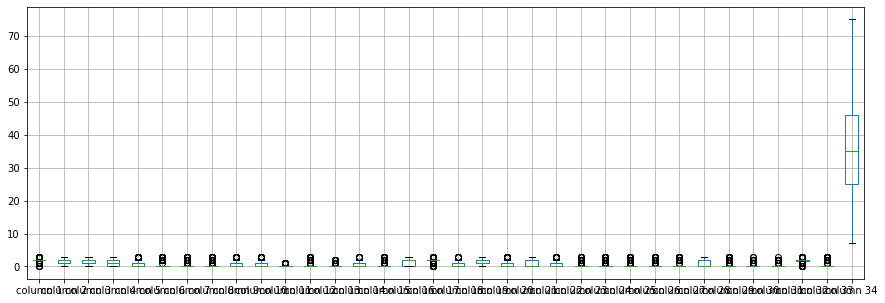

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.089506
column 2      1.812317
column 3      1.580645
column 4      1.354749
column 5      0.621701
column 6      0.445748
column 7      0.163399
column 8      0.323529
column 9      0.583333
column 10     0.530726
column 11     0.123457
column 12     0.342020
column 13     0.141975
column 14     0.496732
column 15     0.294118
column 16     1.370588
column 17     1.958824
column 18     0.511173
column 19     1.259516
column 20     0.598039
column 21     0.978395
column 22     0.515571
column 23     0.278638
column 24     0.339869
column 25     0.332180
column 26     0.427245
column 27     0.424149
column 28     0.910217
column 29     0.435185
column 30     0.071207
column 31     0.090909
column 32     1.873457
column 33     0.530792
column 34    35.996540
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.387868,0.215208,-0.008721,-0.008465,0.029937,-0.087801,0.013468,0.092676,0.159825,...,-0.001308,0.110661,0.040504,0.017638,0.017566,-0.050941,-0.013122,0.071086,-0.004797,-0.071772
column 2,0.387868,1.000000,0.300213,-0.054178,0.000047,-0.074974,-0.108915,-0.064846,0.262483,0.307179,...,-0.083079,0.211164,-0.127218,0.012035,-0.081944,-0.054138,-0.006253,-0.019283,-0.134837,-0.033791
column 3,0.215208,0.300213,1.000000,-0.079374,0.216804,0.309584,-0.145087,0.291115,0.302189,0.245651,...,0.223066,0.333634,0.250336,-0.287273,0.278791,-0.083553,-0.097244,0.146986,0.250535,0.124803
column 4,-0.008721,-0.054178,-0.079374,1.000000,0.263480,0.408399,-0.135237,0.357782,-0.270564,-0.152562,...,0.352524,-0.215579,0.362275,-0.000083,0.378106,-0.134667,-0.150167,0.032749,0.385235,0.038687
column 5,-0.008465,0.000047,0.216804,0.263480,1.000000,0.384333,-0.160980,0.396167,-0.041134,0.018286,...,0.343132,-0.018026,0.350778,0.000074,0.386334,-0.115041,-0.157689,0.101172,0.369509,0.062238
column 6,0.029937,-0.074974,0.309584,0.408399,0.384333,1.000000,-0.136963,0.888289,-0.259016,-0.256072,...,0.860580,-0.116702,0.914634,0.068047,0.904594,-0.074119,-0.101228,0.239419,0.904783,0.111368
column 7,-0.087801,-0.108915,-0.145087,-0.135237,-0.160980,-0.136963,1.000000,-0.118412,0.217490,-0.006910,...,-0.120213,-0.153033,-0.134138,0.003969,-0.134503,0.766570,0.846725,-0.115016,-0.122202,-0.293708
column 8,0.013468,-0.064846,0.291115,0.357782,0.396167,0.888289,-0.118412,1.000000,-0.265282,-0.248920,...,0.911443,-0.097070,0.894371,0.137148,0.884586,-0.082038,-0.090092,0.224270,0.898781,0.107077
column 9,0.092676,0.262483,0.302189,-0.270564,-0.041134,-0.259016,0.217490,-0.265282,1.000000,0.625241,...,-0.266262,0.400246,-0.264324,-0.425506,-0.272519,0.206289,0.203628,-0.064610,-0.274127,-0.063879
column 10,0.159825,0.307179,0.245651,-0.152562,0.018286,-0.256072,-0.006910,-0.248920,0.625241,1.000000,...,-0.249732,0.495736,-0.252581,-0.435013,-0.260091,-0.039890,-0.026214,0.013211,-0.255564,0.043404


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+44,34+44+44,34+44+44+44,34+44+44+44+44,34+44+44+44+44+44,34+44+44+44+44+44+44,34+44+44+44+44+44+44+44,34+44+44+44+44+44+44,34+44+44+44+44+44,34+44+44+44+44,34+44+44+44,34+44+44,34+44,34], vae_layer = False, seed = 44)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 64.16913760792126
Epoch: 1 , loss: 64.02603496204723
Epoch: 2 , loss: 64.02793450789018
Epoch: 3 , loss: 63.49796520579945
Epoch: 4 , loss: 63.54019529169256
Epoch: 5 , loss: 63.210022319446914
Epoch: 6 , loss: 62.44068769975142
Epoch: 7 , loss: 59.894685225053266
Epoch: 8 , loss: 58.57577809420499
Epoch: 9 , loss: 57.77786150845614
Epoch: 10 , loss: 57.374780134721235
Epoch: 11 , loss: 56.600487448952414
Epoch: 12 , loss: 56.625093113292344
Epoch: 13 , loss: 55.908099781383164
Epoch: 14 , loss: 55.38828745755282
Epoch: 15 , loss: 55.54082835804332
Epoch: 16 , loss: 55.387242403897375
Epoch: 17 , loss: 54.700916810469195
Epoch: 18 , loss: 54.653819517655805
Epoch: 19 , loss: 54.42143648320978
Epoch: 20 , loss: 54.509552868929774
Epoch: 21 , loss: 54.14944197914817
Epoch: 22 , loss: 54.22223541953347
Epoch: 23 , loss: 53.71702107516202
Epoch: 24 , loss: 53.79338004372337
Epoch: 25 , loss: 53.42567097056

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.157134
column 9      0.377846
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    15.942177
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0.920788,0.000000,0,0.0,0.0,0.000000,0.00000,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,-1.712264,28.953503
1,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.14869,0.000000,0,...,0.117678,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,6.629326
2,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.00000,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0.182188,-2.975255,0.0,0.0,0.000000,11.493698
3,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.00000,-1.547086,0,...,0.000000,0.000000,0.0,0.000000,0.000000,-2.015164,0.0,0.0,0.240614,0.000000
4,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.00000,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0.000000,-1.973551,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,0.000000,1.609218,0,0.0,0.0,0.000000,0.00000,0.000000,0,...,-0.015219,0.463987,0.0,0.000000,0.105749,0.000000,0.0,0.0,0.000000,-40.016527
354,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.00000,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-50.805048
355,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.00000,0.000000,0,...,0.130246,0.000000,0.0,0.000000,0.392386,0.000000,0.0,0.0,0.000000,-41.795729
356,-0.664514,0.000000,0.000000,0,0.0,0.0,0.000000,0.00000,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-52.170675


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(212.6774928769273, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.28055031305816464

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      2.146708
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     1.428515
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,1.920788,1.000000,1,1.0,0.0,0.000000,0.00000,2.000000,2,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.287736,28.953503
1,1.000000,1.000000,2.000000,0,0.0,0.0,3.000000,0.14869,3.000000,0,...,0.117678,0.000000,0.0,0.000000,0.000000,2.000000,2.0,2.0,0.000000,13.629326
2,2.000000,2.000000,1.000000,0,0.0,0.0,3.000000,0.00000,2.000000,0,...,0.000000,0.000000,0.0,2.000000,0.182188,0.024745,3.0,2.0,0.000000,18.493698
3,2.000000,2.000000,2.000000,1,0.0,0.0,2.000000,0.00000,0.452914,2,...,0.000000,0.000000,0.0,2.000000,0.000000,-0.015164,2.0,2.0,0.240614,7.000000
4,2.000000,2.000000,1.000000,0,0.0,0.0,2.000000,0.00000,2.000000,0,...,0.000000,0.000000,0.0,3.000000,0.000000,0.026449,2.0,2.0,0.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,2.000000,1.609218,2,1.0,0.0,0.000000,0.00000,0.000000,0,...,-0.015219,0.463987,0.0,3.000000,0.105749,0.000000,0.0,3.0,0.000000,29.983473
354,2.000000,3.000000,2.000000,0,0.0,0.0,0.000000,0.00000,3.000000,2,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,19.194952
355,2.000000,2.000000,2.000000,1,0.0,0.0,0.000000,0.00000,0.000000,0,...,0.130246,0.000000,0.0,2.000000,0.392386,0.000000,0.0,2.0,0.000000,28.204271
356,1.335486,1.000000,0.000000,3,0.0,0.0,0.000000,0.00000,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,17.829325


In [20]:
imputations[-1].to_excel("DERM_NN_10(imp).xlsx", index=False, header=False)